<a href="https://colab.research.google.com/github/meriem-belkacemi/Test-SIC/blob/main/problem_0701.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quiz #0701

[texte du lien](https://)### "TensorFlow machine learning with Calilfornia housing data"

In [69]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')    # Turn the warnings off.

#### Answer the following question by providing Python code:

In [70]:
# Bring the data.
housing_data = fetch_california_housing()

In [71]:
# Read the description.
print(housing_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

1). Explore the data:
- Display the dataset as a DataFrame with column labels.

In [72]:
df = pd.DataFrame(housing_data.data,
				   columns=housing_data.feature_names)
df["median_house_value"]=housing_data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


2). Build a machine learning model with TensorFlow. 
- Preprocess the data if necessary.
- Build a linear regression model.
- Train the model.
- Calculate the error metrics such as MSE and RMSE (in-sample and out-of-sample). Target: RMSE < 1.

In [73]:
from IPython.core import display as ICD
a = pd.DataFrame(df.isnull().sum())
a['# of null values'] = a[0]
b = a[['# of null values']]
ICD.display(b)

,# of null values
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
median_house_value,0


Great ! There are no missing values


In [74]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

df.iloc[:,1:-1] = norm.fit_transform(df.iloc[:,1:-1])

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,0.117481,0.020012,0.002934,0.922653,0.007323,0.108541,-0.350236,4.526
1,8.3014,0.008734,0.002594,0.000404,0.998541,0.000877,0.015745,-0.050830,3.585
2,7.2574,0.100981,0.016095,0.002085,0.963201,0.005442,0.073502,-0.237383,3.521
3,5.6431,0.090454,0.010119,0.001867,0.970637,0.004432,0.065840,-0.212653,3.413
4,3.8462,0.089396,0.010799,0.001859,0.971324,0.003750,0.065070,-0.210167,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,0.029242,0.005902,0.001326,0.988385,0.002995,0.046179,-0.141637,0.781
20636,2.5568,0.047540,0.016148,0.003475,0.940233,0.008248,0.104297,-0.320128,0.771
20637,1.7000,0.016746,0.005128,0.001103,0.991928,0.002291,0.038840,-0.119406,0.923
20638,1.8672,0.023932,0.007086,0.001558,0.985191,0.002823,0.052424,-0.161300,0.847


## **Let's do some data visualization for feature selection**

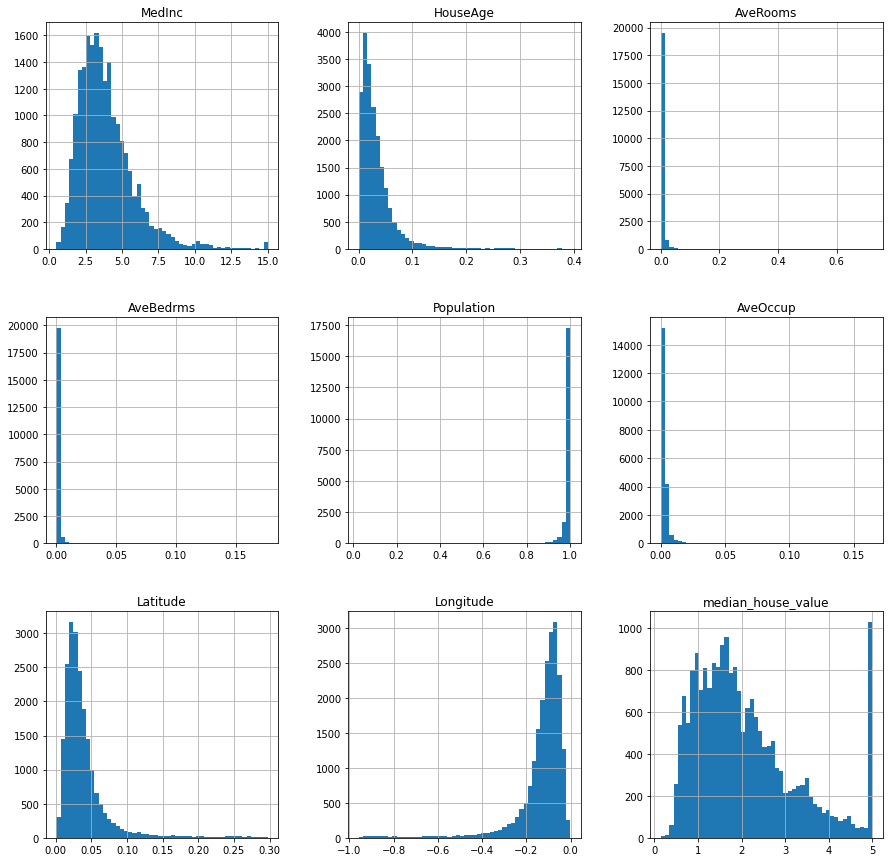

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15,15))
plt.show()

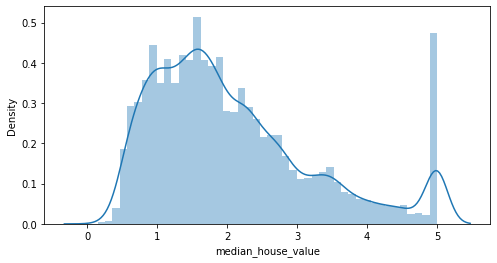

In [76]:
plt.figure(figsize=(8,4))
sns.distplot(df["median_house_value"])

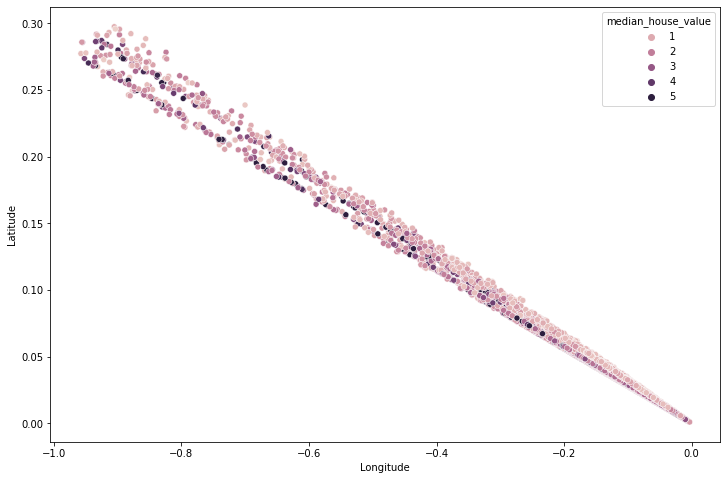

In [77]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Longitude",y="Latitude",data=df,hue="median_house_value")

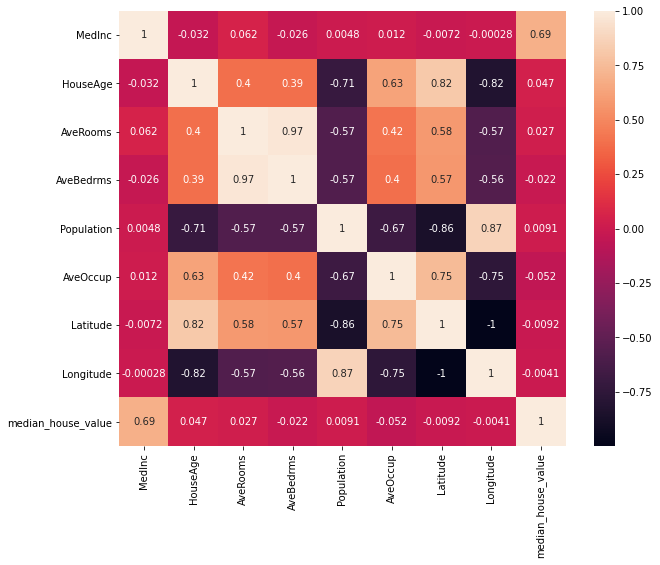

In [78]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

MedInc is the most correlated with the target, we'll work with it

In [129]:
X = df["MedInc"]
y = df["median_house_value"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [130]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
b1 = tf.Variable(1.0)
b0 = tf.Variable(1.0) 

X_ph = tf.placeholder(tf.float32,shape=(None))
y_ph= tf.placeholder(tf.float32,shape=(None))

y_model= X_ph*b1 + b0

loss = tf.reduce_mean(tf.square(y_ph - y_model)) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [131]:
X_train.shape


(14448,)

In [132]:
y_train.shape


(14448,)

In [133]:
n_epochs = 500                                                          # N# of epochs (gradient descent steps).
train = optimizer.minimize(loss)                                          # Define training. Use optimizer.minimize(loss)
init = tf.global_variables_initializer()                                  # Define Variable initialization, returns an Op that initializes global variablestf.global_variables_initializer().
                                                                          

with tf.Session() as sess:
        # Variables initialization.
        sess.run(init)

        # Training.
        my_feed = {X_ph:X_train, y_ph:y_train}  # Prepare feed data as a dictionary. 
        
        for i in range(n_epochs):
            sess.run(train, feed_dict = my_feed)

        b0_model, b1_model = sess.run([b0, b1])      # Get the final values of the Variables.
        # Testing.
        
        mse_value = sess.run(loss, feed_dict = my_feed)

In [134]:
print("Parameters b0 = {:5.3f} , b1 = {:5.3f}".format(b0_model, b1_model))

Parameters b0 = 0.790 , b1 = 0.346


In [135]:
print("MSE  = {:5.3f}".format(mse_value))
print("RMSE = {:5.3f}".format(np.sqrt(mse_value)))

MSE  = 0.728
RMSE = 0.853


In [136]:

X_th = tf.placeholder(tf.float32)
y_model = b1_model*X_th + b0_model

In [137]:
with tf.Session() as sess:
        my_feed = {X_th:X_test}
        y_pred_value = sess.run(y_model, feed_dict = my_feed)

In [138]:

from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, y_pred_value)
rmse_test = np.sqrt(mse_test)
print("MSE  = {:5.3f}".format(mse_test))
print("RMSE = {:5.3f}".format(rmse_test))


MSE  = 0.713
RMSE = 0.844


RMSE is lower than 1, great !